In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
customers = pd.read_csv("E:\Ecommercedata\Customers.csv")
products = pd.read_csv("E:\Ecommercedata\Products.csv")
transactions = pd.read_csv("E:\Ecommercedata\Transactions.csv")


print("Customers Head:\n", customers.head())
print("Products Head:\n", products.head())
print("Transactions Head:\n", transactions.head())

# Check for missing values

print("Missing Values in Customers:\n", customers.isnull().sum())
print("Missing Values in Products:\n", products.isnull().sum())
print("Missing Values in Transactions:\n", transactions.isnull().sum())


# Merge datasets for unified analysis

merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")



Customers Head:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Head:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Head:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127

In [6]:
#Customer Segmentation / Clustering
# Combine profile and transaction information

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Davies-Bouldin Index: 0.9710003657739751


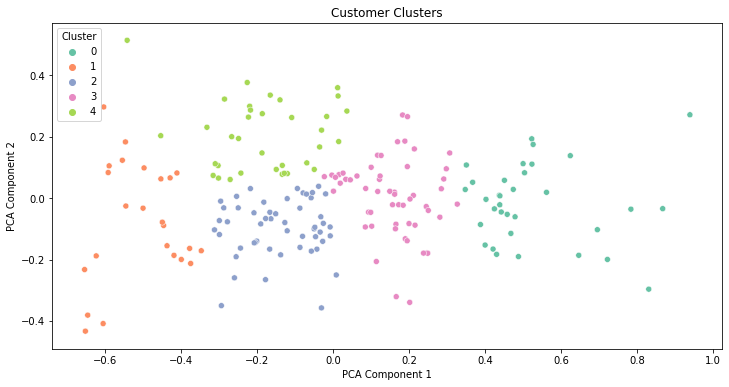

In [7]:
if 'Price' not in merged_data.columns:
    merged_data['Price'] = merged_data['TotalValue'] / merged_data['Quantity']



customer_segmentation = merged_data.groupby("CustomerID").agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean',
    'Quantity': 'sum'
}).rename(columns={
    'TotalValue': 'TotalSpend',
    'TransactionID': 'TransactionCount',
    'Price': 'AvgPrice',
    'Quantity': 'TotalQuantity'
})

scaler = MinMaxScaler()
scaled_segmentation_data = scaler.fit_transform(customer_segmentation)

#KMeans clustering

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_segmentation_data)
customer_segmentation['Cluster'] = kmeans_labels


# Calculate Davies-Bouldin Index

db_index = davies_bouldin_score(scaled_segmentation_data, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters using PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_segmentation_data)
customer_segmentation['PCA1'] = reduced_data[:, 0]
customer_segmentation['PCA2'] = reduced_data[:, 1]


plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_segmentation, palette='Set2')
plt.title("Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()
